In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def fct_velocity(x, latency, tau, steady_state) :

    time = x
    velocity = []
    maxi = steady_state
    for t in range(len(time)) :

        if time[t] < latency :
            velocity.append(0)
        else :
            velocity.append(maxi*(1-np.exp(-1/tau*(time[t]-latency))))

    return velocity


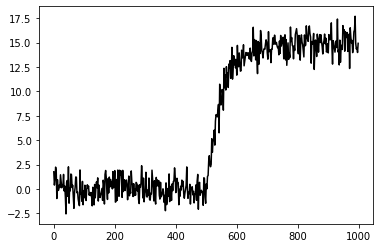

In [3]:
x = np.asarray(range(0, 1000, 2))
latency = 500
tau = 50
steady_state = 15
np.random.seed(0)

velo = fct_velocity(x, latency, tau, steady_state)
velo += 1*np.random.randn(x.size)

plt.plot(x, velo, 'k');

In [4]:
param_fit = [{'name':'steady_state', 'value':12,  'min':5.,  'max':40.},
             {'name':'latency',      'value':500, 'min':100, 'max':700},
             {'name':'tau',          'value':15., 'min':13., 'max':80.}]

inde_vars = {'x': x}

from lmfit import  Model, Parameters

equation = fct_velocity

params = Parameters()
model = Model(equation, independent_vars=inde_vars.keys())

for num_par in range(len(param_fit)) :
    params.add(param_fit[num_par]['name'],
               value = param_fit[num_par]['value'],
               min   = param_fit[num_par]['min'],
               max   = param_fit[num_par]['max'])

result_deg = model.fit(velo, params, nan_policy='omit', **inde_vars)


In [5]:
result_deg

In [6]:
result_deg.values['latency']

501.5071921687859

# NaN

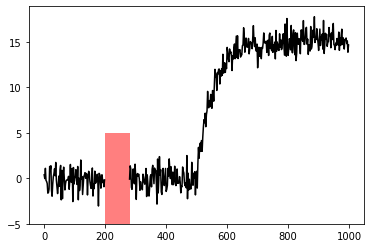

In [7]:
y1=100
y2 = y1+40
    
velo = fct_velocity(x, latency, tau, steady_state)
velo += 1*np.random.randn(x.size)
velo[y1:y2] = np.nan

plt.bar(200, 10, width=80, color='r', bottom=-5, align='edge', alpha=.5)
plt.plot(x, velo, 'k');

In [8]:
N_test = 200

std_lat = []
for y1 in range(0, 500, 20) :
    
    y2 = y1+40
    
    velo = fct_velocity(x, latency, tau, steady_state)
    velo += 1*np.random.randn(x.size)
    
    velo[y1:y2] = np.nan
    
    Lats = []
    for i_test in range(N_test):
        

        for num_par in range(len(param_fit)) :
            params.add(param_fit[num_par]['name'],
                       value = param_fit[num_par]['value']+np.random.choice([1, -1])*(100*np.random.rand()),
                       min   = param_fit[num_par]['min'],
                       max   = param_fit[num_par]['max'])

        result_deg = model.fit(velo, params, nan_policy='omit', **inde_vars)
        Lats.append(result_deg.values['latency'])
        
    std_lat.append(np.std(Lats))
    print('y[', y1*2, ',', y2*2, '] =', np.mean(Lats), '+/-', np.std(Lats))

y[ 0 , 80 ] = 485.401008943563 +/- 41.418870974395496
y[ 40 , 120 ] = 479.25311307186996 +/- 44.599226060040536
y[ 80 , 160 ] = 487.25182606364285 +/- 46.94054972399799
y[ 120 , 200 ] = 480.1046850997144 +/- 47.21591269550817
y[ 160 , 240 ] = 486.9119305152203 +/- 46.06308104894862
y[ 200 , 280 ] = 480.4021021297824 +/- 51.89599427018213
y[ 240 , 320 ] = 482.76851961579894 +/- 49.93694508126542
y[ 280 , 360 ] = 484.6476191283427 +/- 41.962363371967406
y[ 320 , 400 ] = 486.5510930897831 +/- 46.33091482749215
y[ 360 , 440 ] = 491.9680034519929 +/- 45.53660934142884
y[ 400 , 480 ] = 495.9182620352476 +/- 67.03103631078274
y[ 440 , 520 ] = 489.9321423832407 +/- 67.31284235265336
y[ 480 , 560 ] = 473.6703471181424 +/- 83.36982846181908
y[ 520 , 600 ] = 495.1319502233948 +/- 60.18960819903292
y[ 560 , 640 ] = 491.29054910133897 +/- 67.822347581835
y[ 600 , 680 ] = 484.0142395113486 +/- 42.638121678815864
y[ 640 , 720 ] = 489.5827562733341 +/- 45.29779413391693
y[ 680 , 760 ] = 483.6292535328

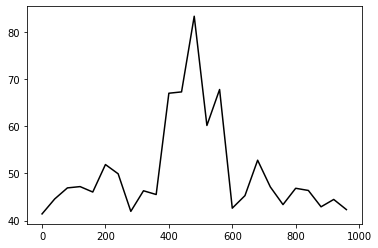

In [9]:
plt.plot(range(0, 1000, 40), std_lat, 'k');